In [3]:
%pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 16.2 MB/s eta 0:00:00


In [16]:

from typing import Annotated
from typing_extensions import TypedDict
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.chat_models import init_chat_model
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

# Define the expected structured output format for the given job information
class JobFormat(BaseModel):
    job_title: str = Field(..., description="The title of the position given.")
    job_description: str = Field(..., description="A description of the position given.")
    job_requirements: str = Field(..., description="A list of requirements for the position given.")

# Define the shared state that moves throughout the LangGraph workflow
class State(TypedDict):
    messages: Annotated[list, add_messages]     # Chat history (all outputs stored here)
    job_breakdown: JobFormat | None             # Structured output from the given initial information
    job_summary: str | None                     # A summary of the given job breakdown
    interview_questions: list[str] | None       # A generated list of both behavioral and technical interview questions for the given job


# Node 1: Parse the initial given user information into structured fields using the JobFormat model
def process_input(state: State):
  pass

# Node 2: Generate a summary based on the given job breakdown
def generate_job_summary(state: State):
  pass

# Node 3: Generate a list of interview questions from the given job summary
def generate_interview_questions(state: State):
  pass


# Define the graph structure using LangGraph
graph_builder = StateGraph(State) # Let LangGraph know what the state is that will be passed around and what fields there are

# Register each of the nodes in the graph
graph_builder.add_node("process_input", process_input)
graph_builder.add_node("generate_job_summary", generate_job_summary)
graph_builder.add_node("generate_interview_questions", generate_interview_questions)

# Define graph edges for node-to-node flow
graph_builder.add_edge(START, "process_input")
graph_builder.add_edge("process_input", "generate_job_summary")
graph_builder.add_edge("generate_job_summary", "generate_interview_questions")
graph_builder.add_edge("generate_interview_questions", END)

# Compile the graph
graph = graph_builder.compile()

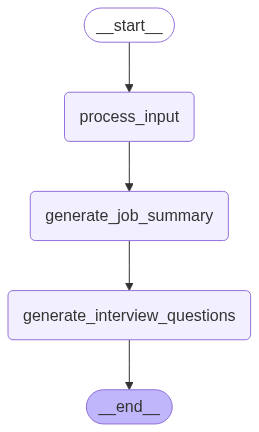

In [17]:
from IPython.display import Image

Image(graph.get_graph().draw_mermaid_png())